# Introduction to TensorFlow & Keras for Classification

## Introduction

From previous lectures and labs, many of you have learned how to program with Python and built an intelligent system. In this lab, we will start to learn the most popular framwork of neural networks from Google -- TensorFlow. 

From this lab, you will learn 
- How to install Tensorflow.
- How to build and optimize a simple neural network model for a classification task (4A). 
- Excise: How to build and optimize a simple neural network model for a regression tasks (4B and 4C). 
- Optional Practice: Understand how Tensorflow update parameters to improve model accuracy (4D).

Note: TensorFlow is a tool for machine learning. While it contains a wide range of functionality, TensorFlow is mainly designed for deep neural network models. You are suggested to read the tutorials from the [website](https://www.tensorflow.org/tutorials/).

## Install TensorFlow and Keras with Anaconda

Recall what we have learned from the lab 1, the basic operation of Anaconda. First, we create a conda environment named NeuralNetwork with `python 3.7`. Then we select the environment and use the anaconda navigator to install the `tensorflow version 1.15` (you can achieve this through: first, right click on the tensorflow clickable square on the left; second, click "mark for specific version for intallation"; third, select 1.15, and then click apply button on the bottom of Anaconda).

We strongly suggest students intall the CPU version first, because the GPU version need GPU support from CUDA Toolkits and other pacakges, setting up the evironment could be exhausted. You may change the CPU version to GPU version later when you are familar with Tensorflow.

Then, using the same way to install package `keras` in the same environment. (no need to select any specific version for keras, anaconda will identify a suitable versino of keras that is compatible with your `tensorflow` version.)

In order to launch jupyter notebook with the created environent NeuralNetwork, you can go to **Anacodna Navigator > Home**, then select environment NeuralNetwork from the dropdown window after **"Applications on"** and check if you have installed jupyter notebook for this environment. If you have intalled, then you can click **"Launch"** to launch jupyter notebook. You should open this file in NeuralNetwork enviroment with tensorflow installed. 

Enter the following short program inside the python interactive shell or jupyter notebook. 

In [7]:
import tensorflow as tf

#hello = tf.constant("Hello, TensorFlow!")
#sess = tf.compat.v1.Session()
#print(sess.run(hello))
#print(tf.__version__)

g = tf.Graph()
with g.as_default():  
  # Define operations and tensors in `g`.  
  hello = tf.constant('hello')  
  assert hello.graph is g

sess = tf.compat.v1.Session(graph=g)
sess.run(hello)


b'hello'

If the system outputs the following, then you are ready to begin writing TensorFlow programs"
```
b'Hello, TensorFlow!'
1.15.0
```
Note: The version of tensorflow may be updated during the time when this lab is being held. DO NOT USE any version >= 2.0.0.

## Part 1: Use Keras with Tensorflow backend to implement what we have done with only tensorflow last week

Note: you may see some WARNING messages about function deprecation here in the results (and in the following codes). This is not an issue and you can just ignore it (if you run again, this warining message won't show again).

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(1)

# fake data
x0 = np.random.normal(2, 1, (100, 2))      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100,)

x1 = np.random.normal(-2, 1, (100, 2))     # class1 x shape=(100, 2)
y1 = np.ones(100)                          # class1 y shape=(100,)
x = np.vstack((x0, x1))  # Stack arrays in sequence vertically (row wise), shape (200, 2)
y = np.hstack((y0, y1))  # Stack arrays in sequence horizontally (column wise). This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis. shape (200, )

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu')) # hidden layer 1
model.add(Dense(2, activation='softmax')) # output layer, we can use softmax activation, with number of neurons equals to the number of classes in the y

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# fit the keras model on the dataset, default batch_size=32
model.fit(x, y, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9294 - accuracy: 0.2950
Epoch 2/10
7/7 [==============================] - 0s 972us/step - loss: 0.7832 - accuracy: 0.3550
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.4250
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7400
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.9050
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.9350
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.9550
Epoch 8/10
7/7 [==============================] - 0s 917us/step - loss: 0.3361 - accuracy: 0.9700
Epoch 9/10
7/7 [==============================] - 0s 833us/step - loss: 0.3012 - accuracy: 0.9750
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.9750


Note that in the previous implementation of a binary classification task, we use softmax activation with 2 neurons for the output layer. Another implementation for binary classification, is to use sigmoid with 1 neuron for the output layer, as presented below. 

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(1)

# fake data
x0 = np.random.normal(2, 1, (100, 2))      # class0 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100,)

x1 = np.random.normal(-2, 1, (100, 2))     # class1 x shape=(100, 2)
y1 = np.ones(100)                       # class1 y shape=(100,)
x = np.vstack((x0, x1))  # Stack arrays in sequence vertically (row wise), shape (200, 2)
y = np.hstack((y0, y1))  # Stack arrays in sequence horizontally (column wise). This is equivalent to concatenation along the second axis, except for 1-D arrays where it concatenates along the first axis. shape (200, )

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.output_shape)

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x, y, epochs=10)

(None, 1)
Epoch 1/10
7/7 [==============================] - 0s 917us/step - loss: 0.2877 - accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 750us/step - loss: 0.2550 - accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1441 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 1.0000


## Part 2: Implementation on real-word dataset
This dataset is the same dataset that we used in last week (Lab 6C)

In [10]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# load the dataset
filename = 'diabetes.csv'
dataframe = pd.read_csv(filename, header=0) # first row is set as the column name of the dataframe
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=77, random_state=7)
print(X_train.shape)
print(Y_train.shape)

(691, 8)
(691,)


### Train a model with 2 hidden layers and an output layer.  
First hidden layer is a dense (fully-connected) layer with 20 neurons and second layer is a dense layer wiht 8 neurons. Since this task is a binary classification task, the output layer can be set as a dense layer with one neuron with sigmoid activation, or a dense layer with two neurons (depending on how many class in the y, since it is a binary task, the neuron number is 2) with softmax activation. We will learn how to set the output layer for a regression task in lab 4B.

In [11]:
# to create reproducible results when writing code with tensorflow and numpy
tf.random.set_seed(1)
np.random.seed(23)

# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)  # verbose: setting of whether to show the progress bar; 0: not show, 1: show

### Evaluate the model

In [6]:
# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

77/77 [==============================] - 0s 215us/step
accuracy: 71.43%


In [7]:
# make class predictions with the model
predictions = model.predict_classes(X_test)

# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], Y_test[i]))

[1.0, 90.0, 62.0, 12.0, 43.0, 27.2, 0.58, 24.0] => 0 (expected 0)
[7.0, 181.0, 84.0, 21.0, 192.0, 35.9, 0.586, 51.0] => 1 (expected 1)
[13.0, 152.0, 90.0, 33.0, 29.0, 26.8, 0.731, 43.0] => 1 (expected 1)
[6.0, 93.0, 50.0, 30.0, 64.0, 28.7, 0.356, 23.0] => 0 (expected 0)
[6.0, 125.0, 78.0, 31.0, 0.0, 27.6, 0.565, 49.0] => 1 (expected 1)


### To monitor the training process, we can train and monitor the training process with a training and validation set

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


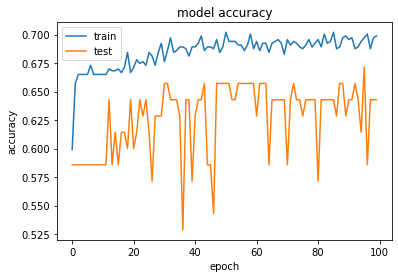

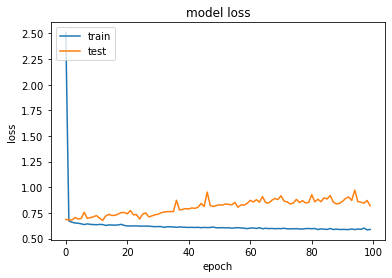

In [8]:
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) #Change the optimizer to sgd and see what happens
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

You can identify that **overfitting** appears, since test loss increases after around 10 epochs.
There are several common techiniques to aviod overfitting: 
1. Early stopping: monitor model performance on a validation set and stop training when performance degrades. 
   So in our case, you can try setting training epochs to 10.
2. Simplify the model: remove layers or reduce the number of neurons to make the network smaller.
3. Dropout: randomly drops neurons from the neural network during training. 
   So in our case, you can try *model.add(Dropout(rate))* where rate is a float between 0 and 1. For example, rate=0.1 will     
   drops 10% neurons from the network.
4. Provide more data: increasing size of the training data.
5. Regulization: add a penalty to the loss function in proportion to the size of the weights in the model.

You can check this link for further information: https://medium.com/analytics-vidhya/the-perfect-fit-for-a-dnn-596954c9ea39

### Let's try to simplify the model with fewer number of neurons

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


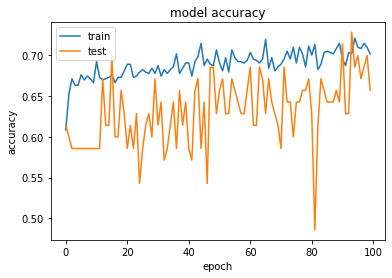

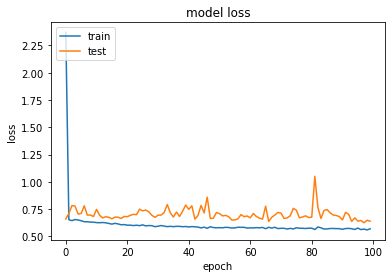

In [9]:
tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) #Change the optimizer to sgd and see what happens
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We have reduced overfitting, but we find that the validation loss fluctuates a lot. It may results from a too big learning rate which leads to a big change on parameters, while your network only needs a slight change after some training. So let's try change our optimization algorithms, and see how it can change the network learning performance.

### Optimization in TensorFlow
Optimize weights given a loss. See [documentation](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers). The following example compare three algorithm to train the neural networks with same structures.
- [SGD](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/SGD)
- [RMSProp](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/RMSprop)
- [Adam](https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/optimizers/Adam)

I found the two links below very useful in understanding the optimization algorithms, you can take a read if you are interested:

https://ruder.io/optimizing-gradient-descent/

https://heartbeat.fritz.ai/exploring-optimizers-in-machine-learning-7f18d94cd65b

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


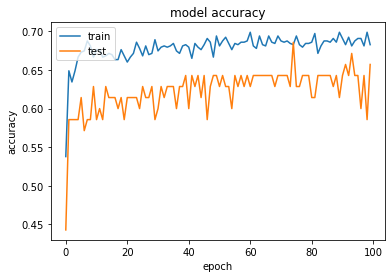

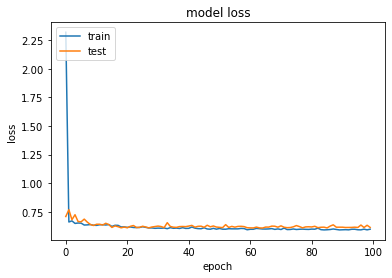

In [10]:
#change the optimizer to momentum 
from keras.optimizers import SGD

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#change sgd with momentum
learning_rate = 0.001
epochs = 100
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate) #change momentum and lr and see how it goes, for example,lr=0.1 and momentum=0.7
# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


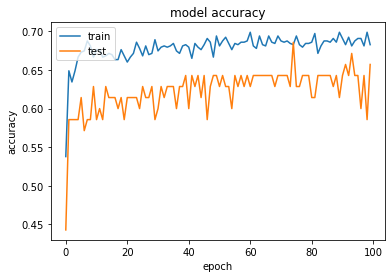

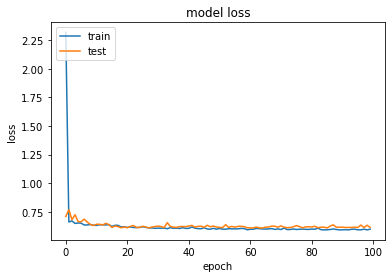

In [11]:
#change the optimizer to momentum 
from keras.optimizers import SGD

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#change sgd with momentum
learning_rate = 0.001
epochs = 100
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.8, decay=decay_rate) #change momentum and lr and see how it goes, for example,lr=0.1 and momentum=0.7
# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


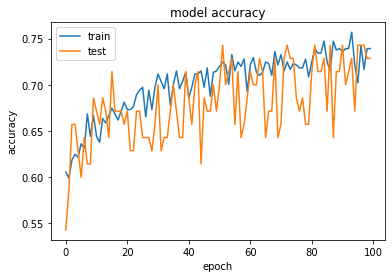

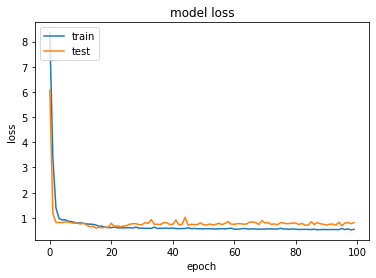

In [12]:
#change the optimizer to adam

tf.set_random_seed(1)
np.random.seed(23)

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #Note that you can add more hidden layers here
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # can change to "rmsprop"
# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0) # use 10% of training dataset for validation

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate the trained model again with testing data

In [13]:
# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

77/77 [==============================] - 0s 38us/step
accuracy: 76.62%


Compared with the testing result before optimizing, we can see that the predicting accuracy has been improved from 71.43% to 76.62%.

### Note:
TensorFlow has APIs available in several languages both for constructing and executing a TensorFlow graph. The Python API is at present the most complete and the easiest to use, but other language APIs may be easier to integrate into projects and may offer some performance advantages in graph execution.

See the [API Python](https://www.tensorflow.org/api_docs) for more details and techniques.


[Keras: The Python Deep Learning library](https://keras.io/): Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano (Note that from Keras version 2.4, it only support tensorflow backend). It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

More to say, there is another package named [PyTorch](http://pytorch.org/) that also provide powerful python based API. You can check their [tutorial](http://pytorch.org/tutorials/) to find more details.